# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Haberman's  Cancer Survival Dataset

## Dataset Description

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



features = ['Age','Treatment_year','Positive_Lymph_Nodes','Survival_status']
#Load Iris.csv into a pandas dataFrame.
haberman = pd.read_csv("C:/Users/taxak/haberman.csv",names=features)



In [9]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [10]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Index([u'Age', u'Treatment_year', u'Positive_Lymph_Nodes', u'Survival_status'], dtype='object')


In [11]:
#Map survival_status to a categorical attribute('Survived','Died')
haberman['Survival_status'] = haberman['Survival_status'].map({1:'Survived',2:'Died'})
haberman.head()

,Age,Treatment_year,Positive_Lymph_Nodes,Survival_status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


In [12]:
#(Q) How many data points in each class ? 
#(or) How many patients in each survival_status ?

haberman["Survival_status"].value_counts()
# balanced-dataset vs imbalanced datasets
# Haberman is a imbalanced-dataset .

Survived    225
Died         81
Name: Survival_status, dtype: int64

# (3.2) 2-D Scatter Plot

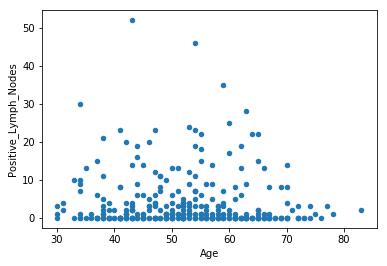

In [13]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.


haberman.plot(kind='scatter', x='Age', y='Positive_Lymph_Nodes') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier (survival_status)class type 1 and type 2 .

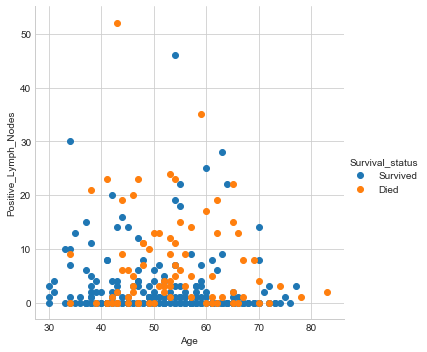

In [14]:
# 2-D Scatter plot with color-coding for each Survival_status/class.
# Here 'sns' corresponds to seaborn. 
"""
Pair plot in seaborn plots the scatter plot between every two data columns in a given dataframe.
It is used to visualize the relationship between two variables
"""
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_status", size=5) \
   .map(plt.scatter, "Age", "Positive_Lymph_Nodes") \
   .add_legend();
plt.show();
# Here survival_status 1(Blue) corresponds to number of patients survived.
# And survival_status 2(Orange) corresponds to number of patients died within 5 years after operation year.

**Observation(s):**
1. Except one person all person belongs to age group from 30 to 80.
2. Majority of patients have positive lymph axillary nodes between 0 to 4.
3. Patients with age more than 50 years and having more than 10 axillary nodes are more likely to die.
4. Survival rates(around 95%) are high for patients belonging to age group 30 - 40.

#  (3.3) Pair-plot

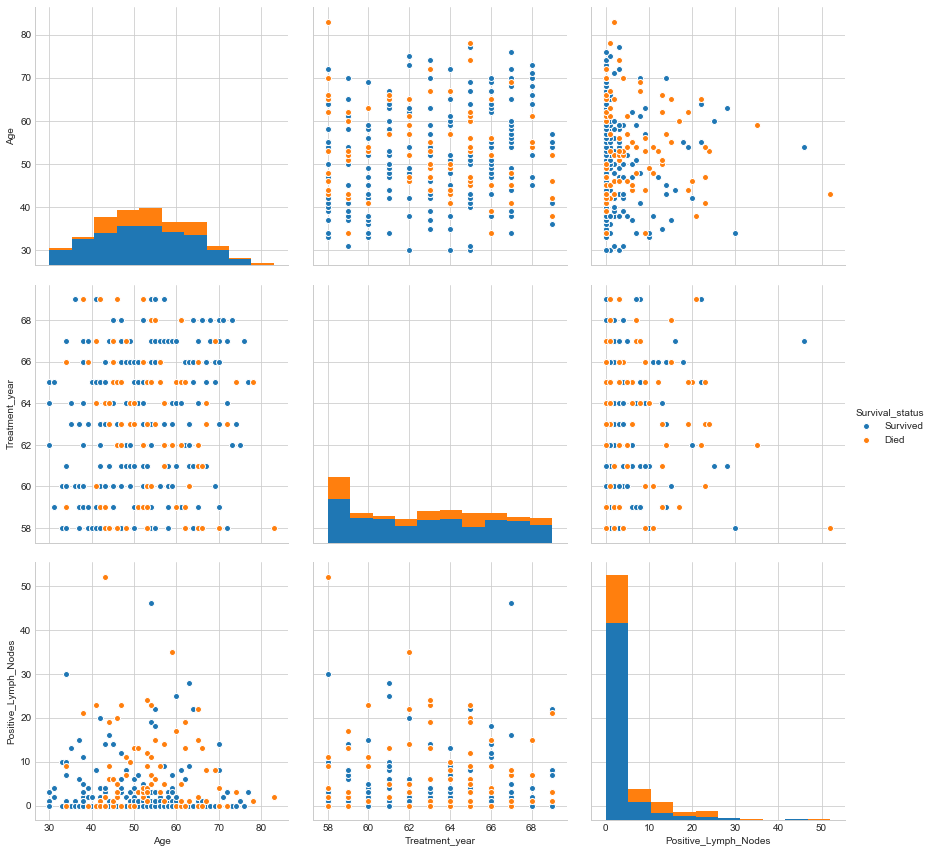

In [15]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Cannot be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view  2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_status",vars=['Age','Treatment_year','Positive_Lymph_Nodes']  ,size=4);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. In the plot Age vs Positive_Lymph_Nodes , around (90-95) % paitients are likely to survive in the age group 30 to 40.
2. Survival status is easily seperable in the plot Treatment_year vs Positive_Lymph_Nodes.

# (3.4) Histogram, PDF, CDF

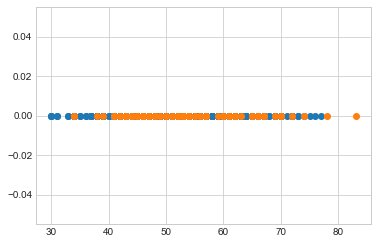

In [16]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot 
import numpy as np
#haberman_survive = haberman.loc[haberman["Survival_status"] == "1"];
#haberman_died = haberman.loc[haberman["Survival_status"] == "2"];
haberman_Survive = haberman[haberman['Survival_status'] == 'Survived']
haberman_Died = haberman[haberman['Survival_status'] == 'Died']

plt.plot(haberman_Survive["Age"], np.zeros_like(haberman_Survive['Age']), 'o')
plt.plot(haberman_Died["Age"], np.zeros_like(haberman_Died['Age']), 'o')


plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

C:\Users\taxak\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


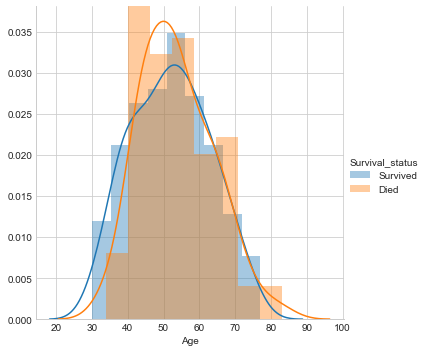

In [17]:
sns.FacetGrid(haberman, hue="Survival_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();



**Observations**
1. Patients in the age-group 30-35 have high survival rates .
2. After that we are not able to draw any good conclusions on the basis of Age of patients as PDF(probability distribution functions) of both the classes are overlapping. 

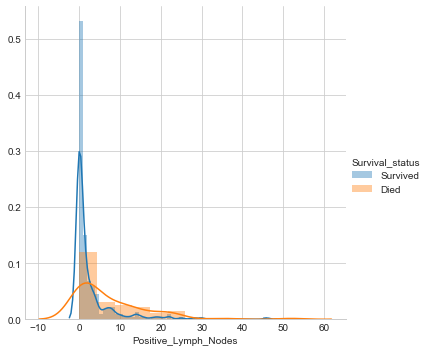

In [18]:
sns.FacetGrid(haberman, hue="Survival_status", size=5) \
   .map(sns.distplot, "Positive_Lymph_Nodes") \
   .add_legend();
plt.show();

**Observations**
1. Plot drawn by using Positive_Lymph_Nodes as X-axis is more useful.
2. This plot shows that, for patients having lymph nodes less than 4(approx), the survial rate is very high.
    (if Lyumph nodes < 4
      then survival rates are high.  )

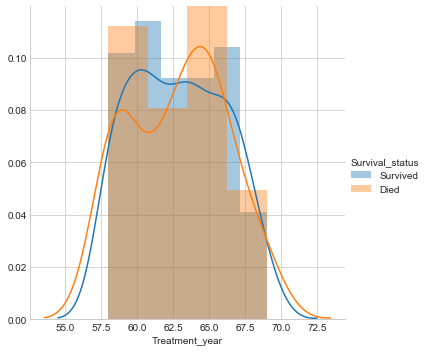

In [19]:
sns.FacetGrid(haberman, hue="Survival_status", size=5) \
   .map(sns.distplot, "Treatment_year") \
   .add_legend();
plt.show();

**Observations**
1. Too much overlapping for Treatment_year not able to draw any good conclusion.


In [20]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.



# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: 

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


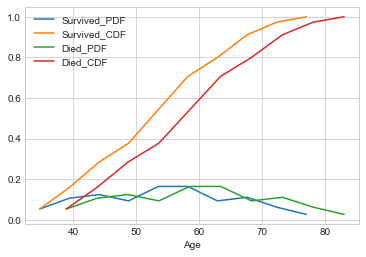

In [21]:
# Plots of CDF of Age for various types of Survival_status.

# haberman_Survive.

counts, bin_edges = np.histogram(haberman_Survive['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
   

# haberman_Died
counts, bin_edges = np.histogram(haberman_Died['Age'], bins=10, 
                                 density = True)
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.legend('Survival_status')
plt.legend(['Survived_PDF', 'Survived_CDF','Died_PDF', 'Died_CDF'])
pdf = counts/(sum(counts))



**Observation**
1. Patients older than 76 years does not survive.
 

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


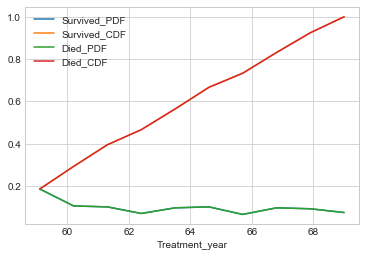

In [22]:
# Plots of CDF of Treatment_year for various types of Survival_status.

# haberman_Survive.

counts, bin_edges = np.histogram(haberman_Survive['Treatment_year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf) 
plt.plot(bin_edges[1:], cdf)
   

# haberman_Died
counts, bin_edges = np.histogram(haberman_Died['Treatment_year'], bins=10, 
                                 density = True)
df = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Treatment_year')
plt.legend('Survival_status')
plt.legend(['Survived_PDF', 'Survived_CDF','Died_PDF', 'Died_CDF'])


**Observations**
1. Year of treatment is least useful for checking survival status.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


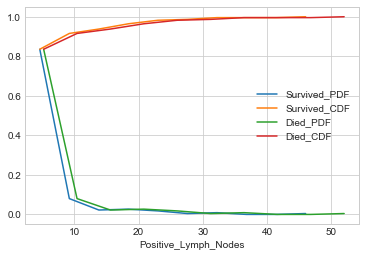

In [23]:
# Plots of CDF of Positive_lymph_Nodes for various types of Survival_status.

# haberman_Survive.

counts, bin_edges = np.histogram(haberman_Survive['Positive_Lymph_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
   

# haberman_Died
counts, bin_edges = np.histogram(haberman_Died['Positive_Lymph_Nodes'], bins=10, 
                                 density = True)
df = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Positive_Lymph_Nodes')
plt.legend('Survival_status')
plt.legend(['Survived_PDF', 'Survived_CDF','Died_PDF', 'Died_CDF'])


**Observation**
1. If axillary nodes are greater than 45 ,then None of the patients survive.
2. 82% of Patients survived have less than 4 axillary Lymph Nodes. 

# (3.5) High Level Statistics

In [25]:
#Mean, Variance, Std-deviation,  
print("Mean age of survived patients:")
print(np.mean(haberman_Survive["Age"]))
print("Mean age died Patients:")
print(np.mean(haberman_Died["Age"]))


print("\nStd-dev:");
print(np.std(haberman_Survive["Age"]))
print(np.std(haberman_Died["Age"]))






Mean age of survived patients:
52.0177777778
Mean age died Patients:
53.6790123457

Std-dev:
10.9876554751
10.104182193


In [26]:
# Statistics of the entire dataset.
haberman.describe()

,Age,Treatment_year,Positive_Lymph_Nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [28]:
# Statistics of the people who survived.
haberman_Survive.describe()

,Age,Treatment_year,Positive_Lymph_Nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [29]:
# Statistics of the people who survived.
haberman_Died.describe()

,Age,Treatment_year,Positive_Lymph_Nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


**Observations**
1. Most of the operations are performed in 1960 to 1966 (as mean= 62.8 and std dev = 3.3).
2. Most of the paients belongs to age group of 42 to 62.
3. If patient age is less than 34 than survival status does not depend on axillary lymph nodes. 

# (3.6)  MAD 

In [31]:
#Median absolute deviation
#calculating deviation from central tendancy.
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_Survive["Age"]))
print(robust.mad(haberman_Died["Age"]))




Median Absolute Deviation
13.343419966550417
11.860817748044816


# (3.7) Box plot and Whiskers

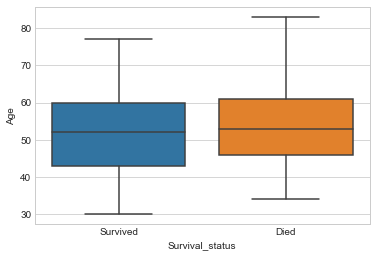

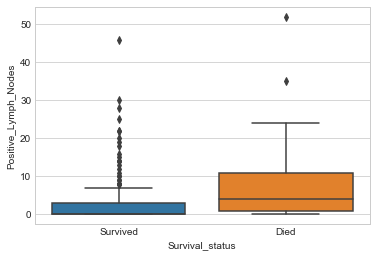

In [36]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Survival_status',y='Age', data=haberman)
plt.show()

sns.boxplot(x='Survival_status',y='Positive_Lymph_Nodes', data=haberman)
plt.show()

**Observations**
1. If age of patient during operation is less than 34, than chances of survival are 100%.
2. If age of patient during operation is greater than 77 and less than 84 ,than he will die.
3. From boxplot of Axillary Nodes we can say more the number of nodes lesser the chances of survival.

# (3.8) Violin plots

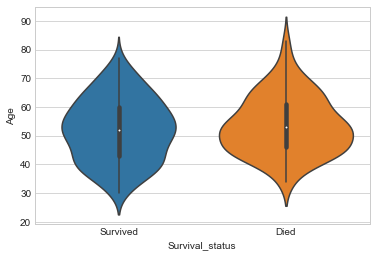

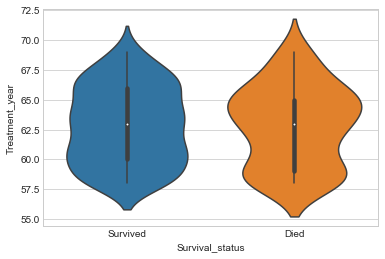

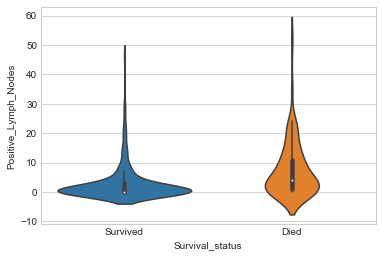

In [35]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="Survival_status", y="Age", data=haberman, size=8)
plt.show()

sns.violinplot(x="Survival_status", y="Treatment_year", data=haberman, size=8)
plt.show()

sns.violinplot(x="Survival_status", y="Positive_Lymph_Nodes", data=haberman, size=8)
plt.show()

**Observations**
1. Densar portion of voilin Plot in case Positive_Lymph_Nodes Vs Survival_status indicates that lesser the number of axillary      Nodes more the chances of survival, if nodes are less than 4 , then more than 50% patients survived.
2. we cannot predict about survival status of patient from  treatment year of a patient.


# (3.9) Summarizing plots.

## Analysis on the basis of Age
1. Patients having age less than 34 years at the time of surgery survived regardless of the number of axillary nodes.
2. Around 50% of patients who had undergone the operation  were  belonging to age group between 42-62 years.
3. None of the patients survive who had age more than 76 years during operation.

## Analysis on the basis of Treatment years
1. More than 50% of the operations were done in the years between 1960-1966.

## Analysis on the basis of Axillary Nodes
1. Lesser the number of nodes more the chances of survival, patients having axillary nodes less than 3 did not die.
2. Patients having axillary nodes greater than 46 , did not survive.
